In [1]:
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # print graph of costs

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fashion-mnist_test.csv
fashion-mnist_train.csv



In [3]:
data=pd.read_csv('../input/fashion-mnist_train.csv')

In [4]:
X_train=data.iloc[:,1:].values.reshape(-1,28,28,1)/255
Y_train=data.iloc[:,0].values.reshape(-1,1)

In [5]:
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 1)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
Y_Train=np.zeros((60000,10))
for elem in range(60000):
    Y_Train[elem,Y_train[elem,0]]=1
Y_train=Y_Train
Xtr,Xte,Ytr,Yte=train_test_split(X_train,Y_train,test_size=0.2)
print(Xtr.shape,Ytr.shape,Xte.shape,Yte.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10)


In [8]:
import tensorflow as tf

In [9]:
X=tf.placeholder(tf.float32,[None,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

In [10]:
c1=tf.contrib.layers.conv2d(X, 10, kernel_size=(3,3))
p1=tf.contrib.layers.max_pool2d(c1,(3,3))
bn1=tf.contrib.layers.batch_norm(p1,center=True, scale=True,is_training=True,scope='bn1')
a1=tf.nn.relu(bn1)

c2=tf.contrib.layers.conv2d(a1, 30, kernel_size=(3,3))
p2=tf.contrib.layers.max_pool2d(c2,(2,2))
bn2=tf.contrib.layers.batch_norm(p2,center=True,scale=True,is_training=True,scope='bn2')
a2=tf.nn.relu(bn2)

c3=tf.contrib.layers.conv2d(a2, 50, kernel_size=(3,3))
p3=tf.contrib.layers.max_pool2d(c3,(2,2))
bn3=tf.contrib.layers.batch_norm(p3,center=True,scale=True,is_training=True,scope='bn3')
a3=tf.nn.relu(bn3)


In [11]:
F=tf.contrib.layers.flatten(a3)
Yhat=tf.contrib.layers.fully_connected(F,10)

In [12]:
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=Yhat))
#tf.nn.softmax_cross_entropy_with_logits()

In [13]:
learning_rate = 0.001
optimizer=tf.train.AdamOptimizer(0.001).minimize(loss)

In [14]:
def random_mini_batches(X_train, Y_train, minibatch_size):
    data_size=Y_train.shape[0]
    
    minibatches = []
    
    num=int(data_size/minibatch_size)
    num_ex=data_size%minibatch_size
    
    if(num_ex>0):
        num=num+1
    
    for i in range(num):
        inds=np.random.randint(0,48000,size=128)
        X_batch,Y_batch=Xtr[inds,...],Ytr[inds,...]
        minibatches.append((X_batch,Y_batch))    
    return minibatches
    
    

Cost after epoch 0: 0.625069
Cost after epoch 1: 0.306065
Cost after epoch 2: 0.252924
Cost after epoch 3: 0.225519
Cost after epoch 4: 0.201082
Cost after epoch 5: 0.184537
Cost after epoch 6: 0.174203
Cost after epoch 7: 0.158390
Cost after epoch 8: 0.148097
Cost after epoch 9: 0.142411
Cost after epoch 10: 0.130587
Cost after epoch 11: 0.122622
Cost after epoch 12: 0.115176
Cost after epoch 13: 0.111654
Cost after epoch 14: 0.102866
Cost after epoch 15: 0.099378
Cost after epoch 16: 0.092787
Cost after epoch 17: 0.085932
Cost after epoch 18: 0.080642
Cost after epoch 19: 0.077018
Cost after epoch 20: 0.074814
Cost after epoch 21: 0.068205
Cost after epoch 22: 0.066314
Cost after epoch 23: 0.065088
Cost after epoch 24: 0.062158
Cost after epoch 25: 0.058044
Cost after epoch 26: 0.053229
Cost after epoch 27: 0.050400
Cost after epoch 28: 0.052378
Cost after epoch 29: 0.050943
Cost after epoch 30: 0.047355
Cost after epoch 31: 0.047833
Cost after epoch 32: 0.048958
Cost after epoch 33:

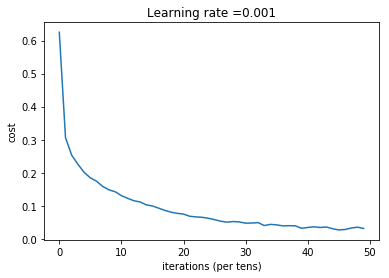

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.992229
Test Accuracy: 0.895417


In [15]:
init = tf.global_variables_initializer()
num_epoch = 50
minibatch_size = 128
costs = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        
        minibatch_cost = 0
        num_minibatches = int(Xtr.shape[0]/minibatch_size)
        minibatches=random_mini_batches(Xtr,Ytr,minibatch_size)
        for minibatch in minibatches:
            (X_batch,Y_batch)=minibatch
            _, temp_cost=sess.run([optimizer,loss],feed_dict={X:X_batch,Y:Y_batch})
            
            minibatch_cost += temp_cost/num_minibatches
        if(epoch%1 == 0):
            print("Cost after epoch %i: %f" % (epoch, minibatch_cost))
        if(epoch%1 == 0):
            costs.append(minibatch_cost)
           
# plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
#         inds=np.random.randint(0,12000,size=128)
#         x,y=Xte[inds],Yte[inds]
#         print(sess.run(loss,feed_dict={X:x,Y:y}))
        # Calculate the correct predictions
    predict_op = tf.argmax(Yhat, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: Xtr, Y: Ytr})
    test_accuracy = accuracy.eval({X: Xte, Y: Yte})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
        